In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import VoigtModel, LinearModel

In [55]:
%pylab inline
pylab.rcParams['figure.figsize'] = (21.0, 16.0)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#Eichung
##Teil 1: Einstellen der Photomuliplier

In [56]:
cd /home/arrow13/Git/FP/Myonen/Messdate/photomulipier/

/home/arrow13/Git/FP/Myonen/Messdate/photomulipier


In [57]:
def err_coutrate(counts,time,err_time):
    '''
        Bestimmung der Fehlers der logarithmischen Countrate
    '''
    err_ct = np.sqrt(np.square(np.sqrt(counts)/time)+np.square((err_time*counts)/(err_time**2)))
    err_log_ct = err_ct/counts/time
    err_log_c = np.sqrt(counts)/counts
    return err_log_c

In [58]:
err_Zeit = [0.5,2]
err_Spannung = [1,1]
PM_list = []
PM_list.append(np.array(pd.read_csv("PM1", delim_whitespace=2)).T)
PM_list.append(np.array(pd.read_csv("PM2", delim_whitespace=2)).T)
PM_list.append(np.array(pd.read_csv("PM3-backup", delim_whitespace=2)).T)
PM_list.append(np.array(pd.read_csv("PM4", delim_whitespace=2)).T)

###PM1: Auswertung

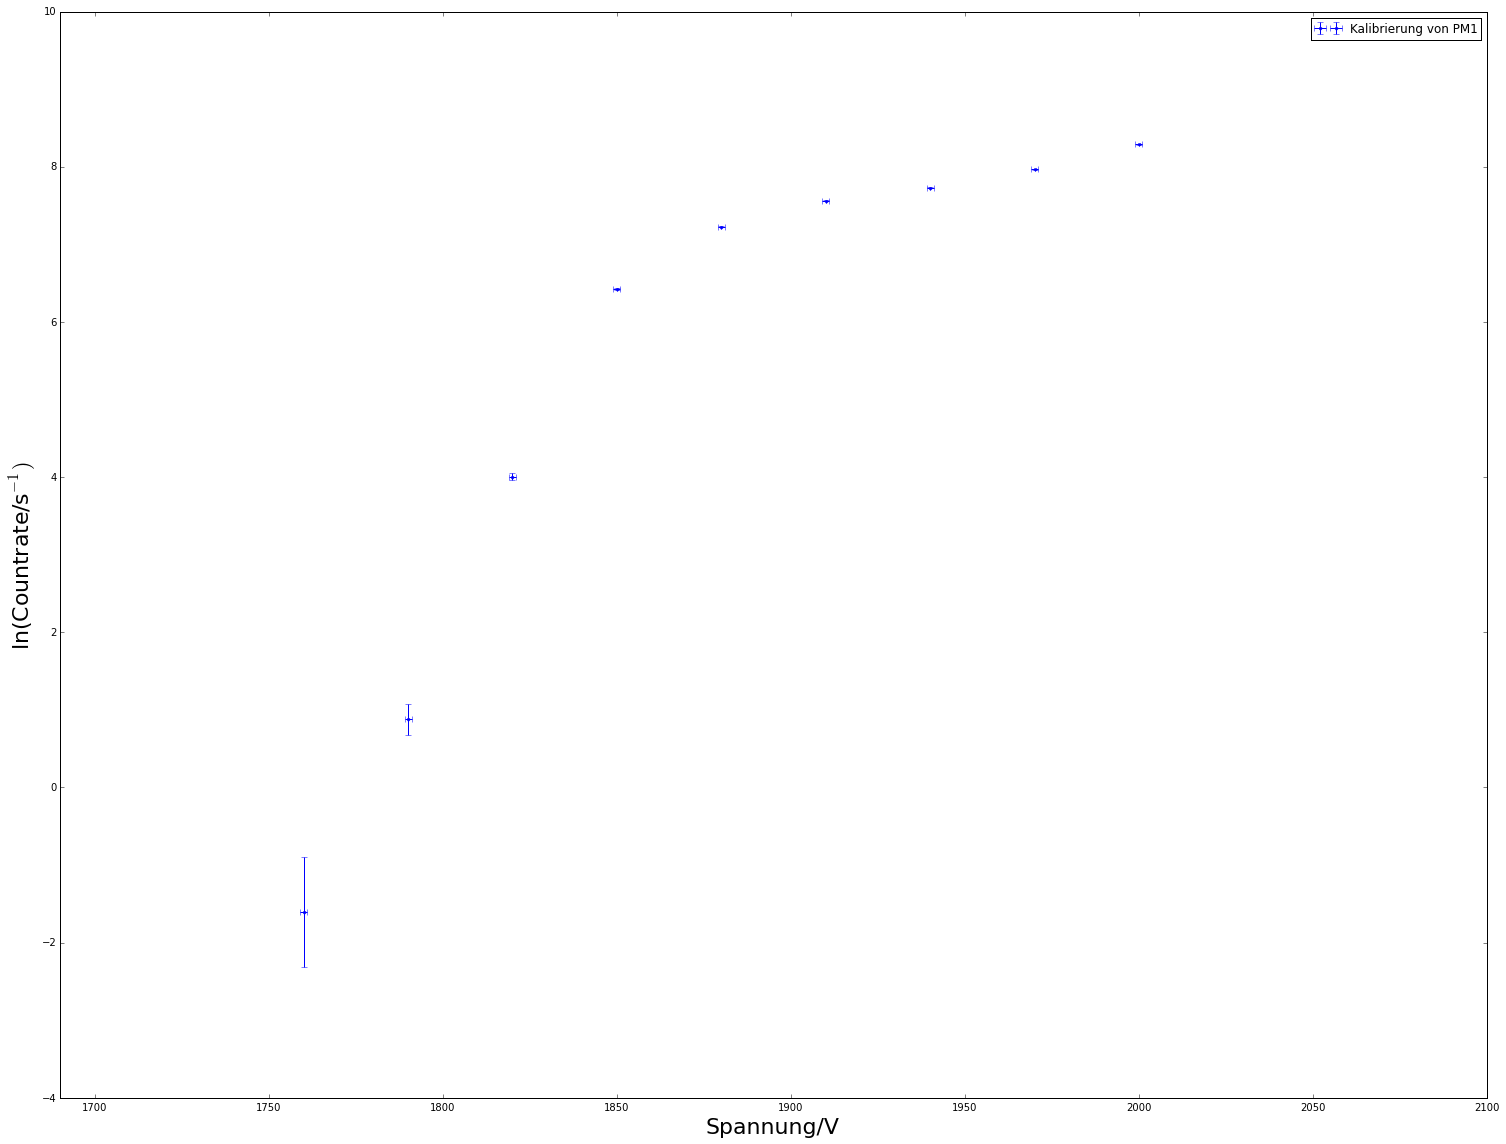

In [59]:
plt.errorbar(PM_list[0][0], np.log(PM_list[0][1]/PM_list[0][2]),err_coutrate(PM_list[0][1],PM_list[0][2],1), xerr=PM_list[0][3], fmt='. ', label="Kalibrierung von PM1")
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s$^{-1})$",fontsize=22)
plt.xlim([1690,2100])
plt.ylim([-4,10])
plt.legend(loc="best")
plt.tight_layout()
plt.show()

###PM2: Auswertung

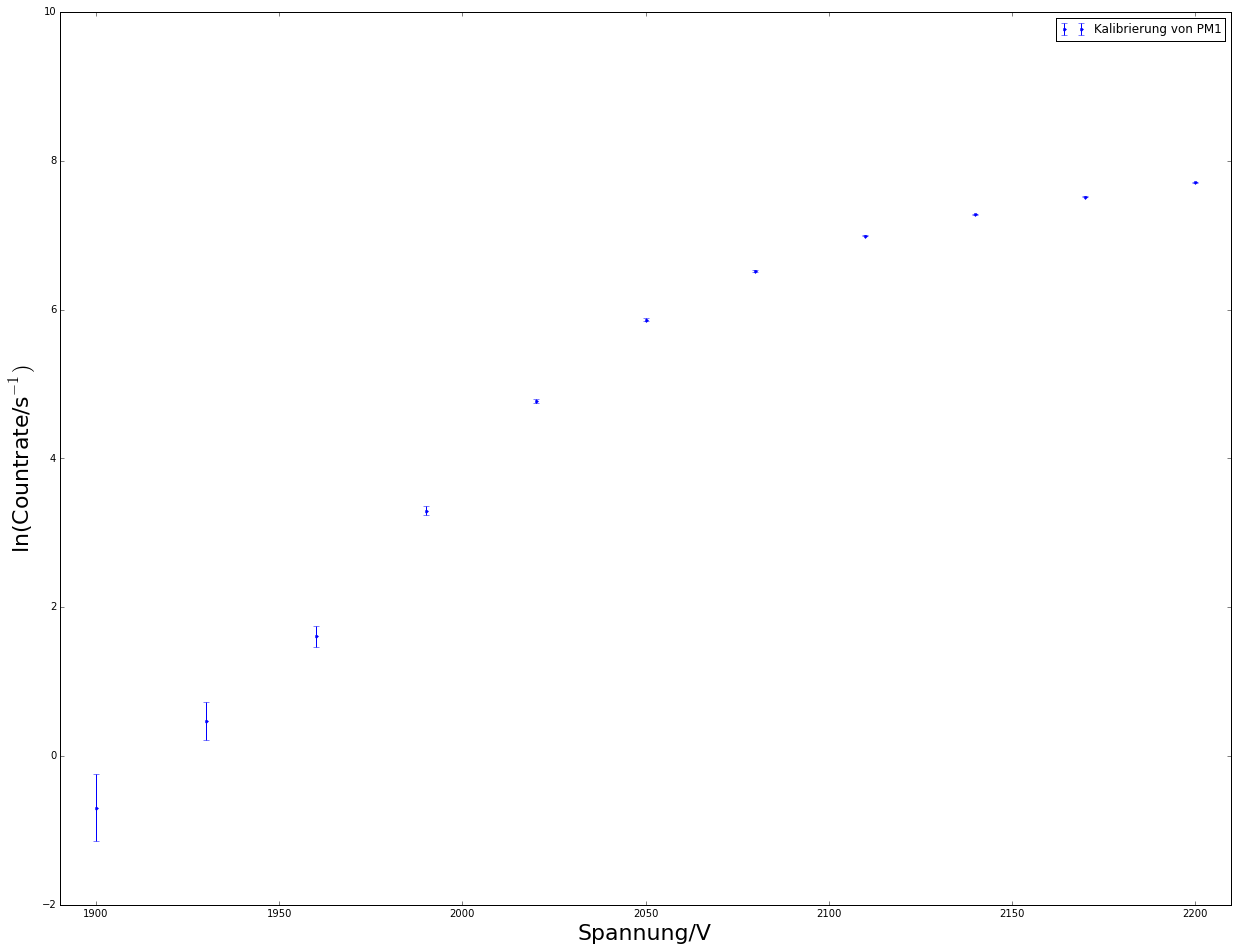

In [60]:
plt.errorbar(PM_list[1][0], np.log(PM_list[1][1]/PM_list[1][2]),err_coutrate(PM_list[1][1],PM_list[1][2],0.1), fmt='. ', label="Kalibrierung von PM1")
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s$^{-1})$",fontsize=22)
plt.xlim([1890,2210])
plt.ylim([-2,10])
plt.legend(loc="best")
plt.show()

###PM3: Auswertung

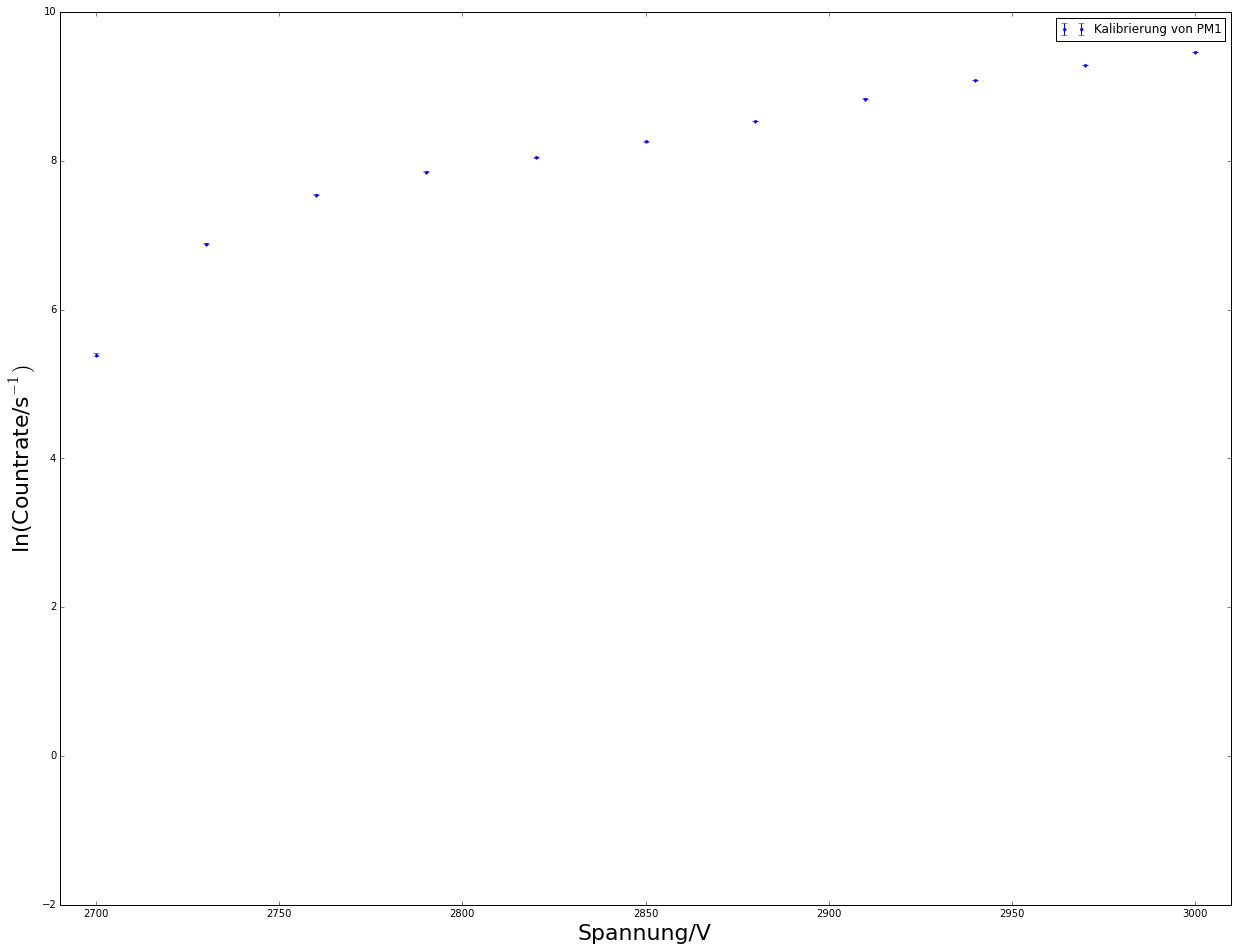

In [61]:
plt.errorbar(PM_list[2][0], np.log(PM_list[2][1]/PM_list[2][2]),err_coutrate(PM_list[2][1],PM_list[2][2],0.1), fmt='. ', label="Kalibrierung von PM1")
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s$^{-1})$",fontsize=22)
plt.xlim([2690,3010])
plt.ylim([-2,10])
plt.legend(loc="best")
plt.show()

###PM4: Auswertung

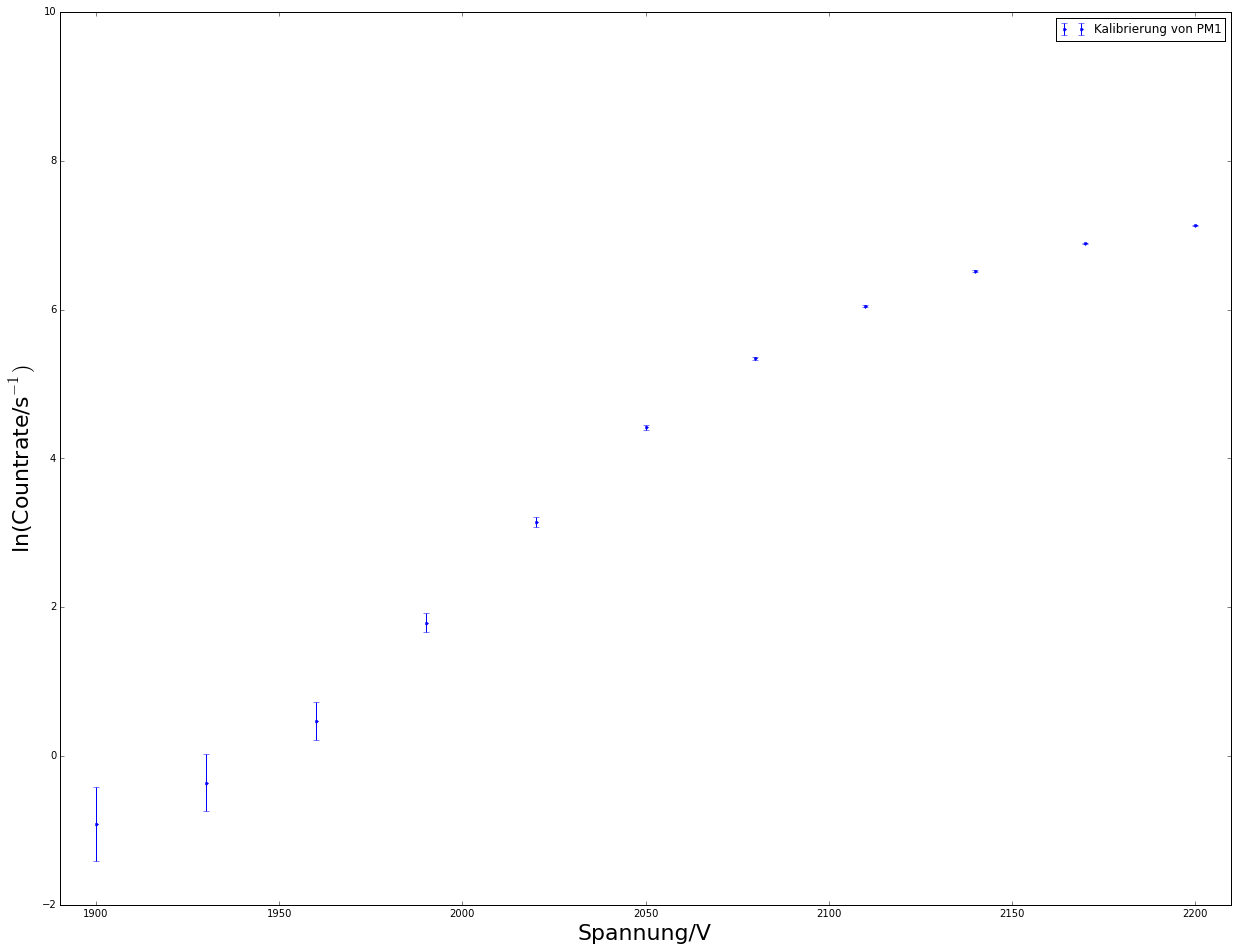

In [62]:
plt.errorbar(PM_list[3][0], np.log(PM_list[3][1]/PM_list[3][2]),err_coutrate(PM_list[3][1],PM_list[3][2],0.1), fmt='. ', label="Kalibrierung von PM1")
plt.xlabel(r"Spannung/V",fontsize=22)
plt.ylabel(r"ln(Countrate/s$^{-1})$",fontsize=22)
plt.xlim([1890,2210])
plt.ylim([-2,10])
plt.legend(loc="best")
plt.show()

###Ergebnisse:
Für die Photomuliplier ergaben sich die folgenden Spannungen:

####PM1: <font color="red">1870V</font>
####PM2: <font color="red">2060V</font>
####PM3: <font color="red">2750V</font>
####PM4: <font color="red">2085V</font>


##Teil2: Diskriminator einstellen

In [63]:
cd /home/arrow13/Git/FP/Myonen/Messdate/Diskriminator/

/home/arrow13/Git/FP/Myonen/Messdate/Diskriminator


In [64]:
D_list = []
D_list.append(np.array(pd.read_csv("PM1", delim_whitespace=2)).T)
D_list.append(np.array(pd.read_csv("PM2", delim_whitespace=2)).T)
D_list.append(np.array(pd.read_csv("PM3", delim_whitespace=2)).T)
D_list.append(np.array(pd.read_csv("PM4", delim_whitespace=2)).T)

###Diskriminator 1:

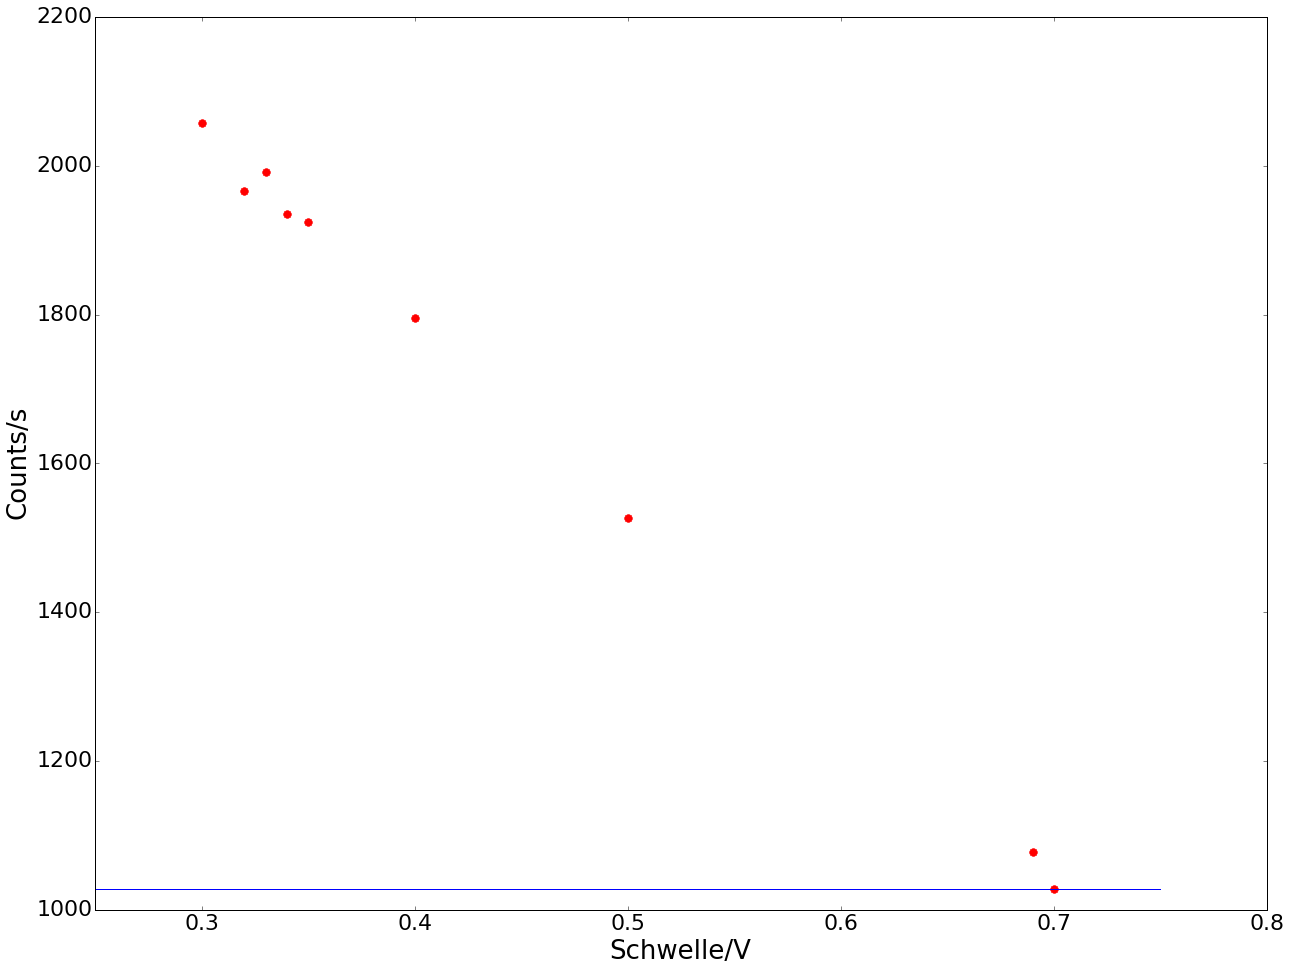

In [96]:
plt.plot(D_list[0][0], (D_list[0][1]-D_list[0][2])/10, '.r' , markersize = 15)
plt.plot(np.arange(0.25,0.8,0.1),np.arange(0.25,0.8,0.1)/np.arange(0.25,0.8,0.1)*(D_list[0][1][0]-D_list[0][2][0])/20, 'b')
plt.xlim([0.25,0.8])
plt.ylim([1000,2200])
plt.tick_params(labelsize= 22)
plt.ylabel(r"Counts/s", fontsize = 26)
plt.xlabel("Schwelle/V", fontsize = 26)
plt.show()

###Diskriminator 2

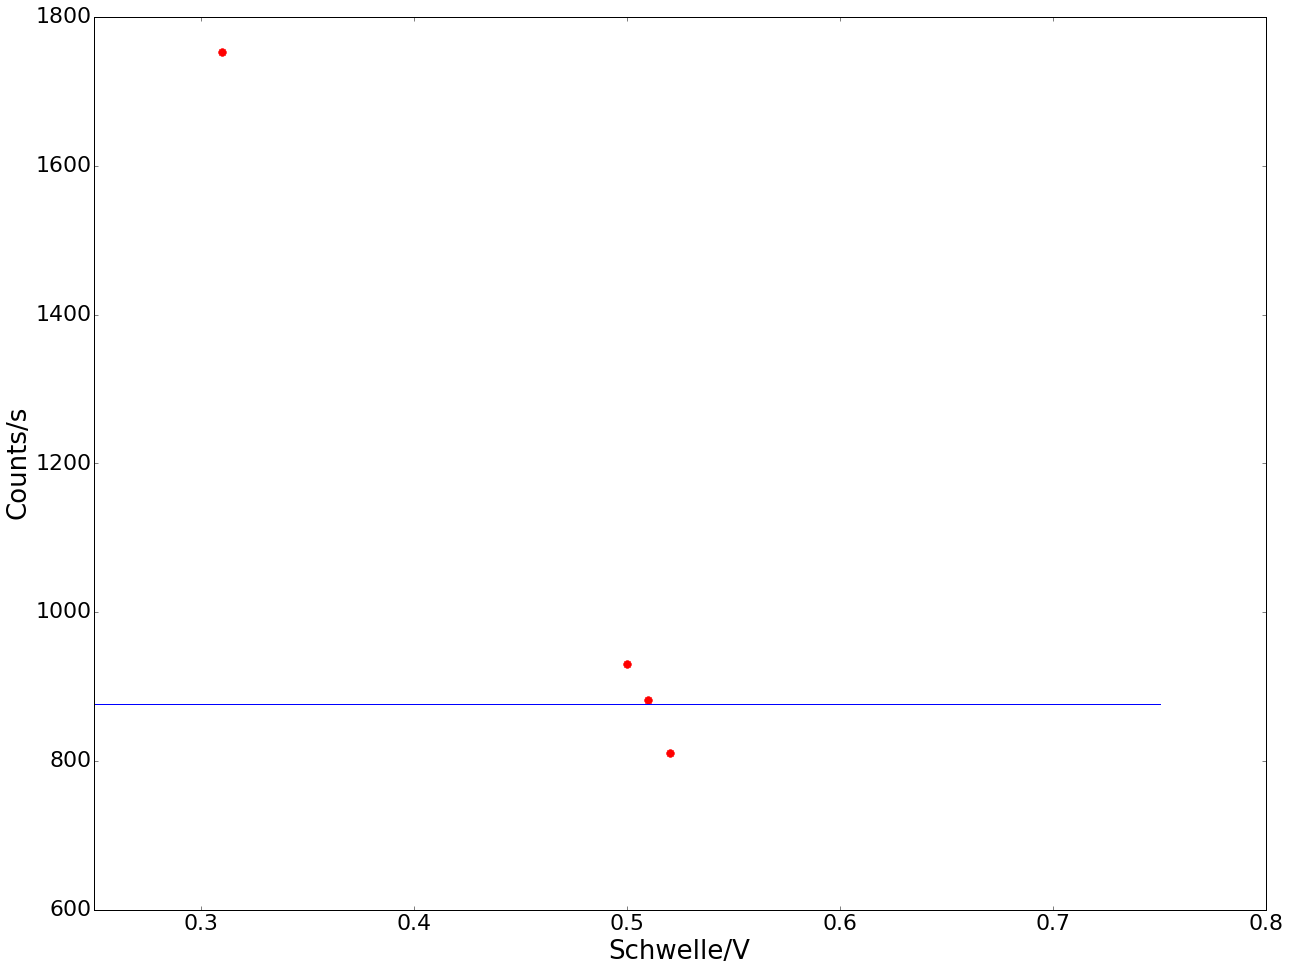

In [97]:
plt.plot(D_list[1][0], (D_list[1][1]-D_list[1][2])/10, '.r', markersize = 15)
plt.plot(np.arange(0.25,0.8,0.1),np.arange(0.25,0.8,0.1)/np.arange(0.25,0.8,0.1)*(D_list[1][1][0]-D_list[1][2][0])/20,'b')
plt.xlim([0.25,0.8])
plt.ylim([600,1800])
plt.tick_params(labelsize= 22)
plt.ylabel(r"Counts/s", fontsize = 26)
plt.xlabel("Schwelle/V", fontsize = 26)
plt.show()

###Diskriminator 3

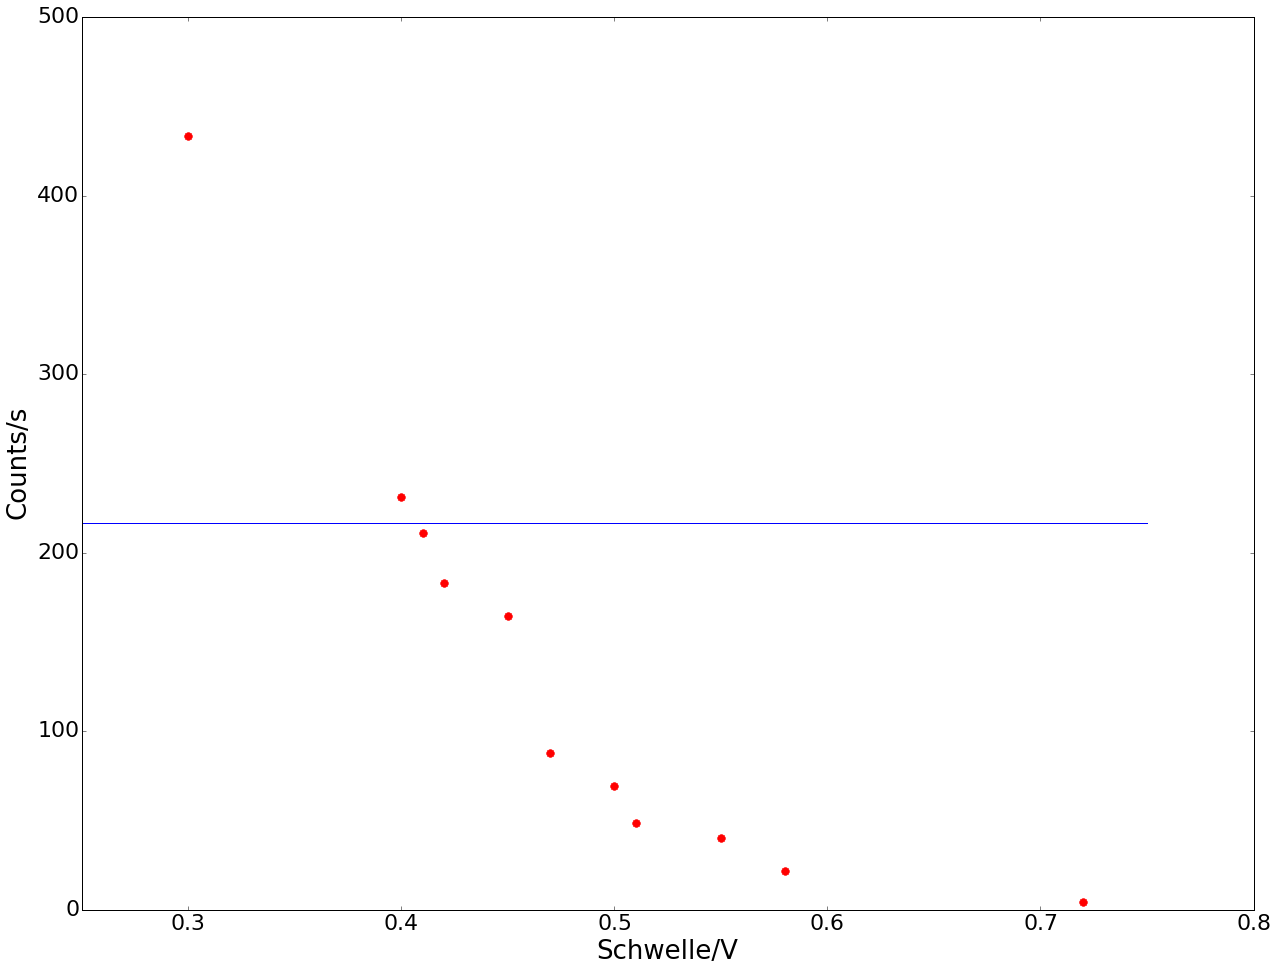

In [99]:
plt.plot(D_list[2][0], (D_list[2][1]-D_list[2][2])/10, '.r', markersize =15)
plt.plot(np.arange(0.25,0.8,0.1),np.arange(0.25,0.8,0.1)/np.arange(0.25,0.8,0.1)*(D_list[2][1][0]-D_list[2][2][0])/20,'b')
plt.xlim([0.25,0.8])
plt.ylim([0,500])
plt.tick_params(labelsize= 22)
plt.ylabel(r"Counts/s", fontsize = 26)
plt.xlabel("Schwelle/V", fontsize = 26)
plt.show()

###Diskriminator 4

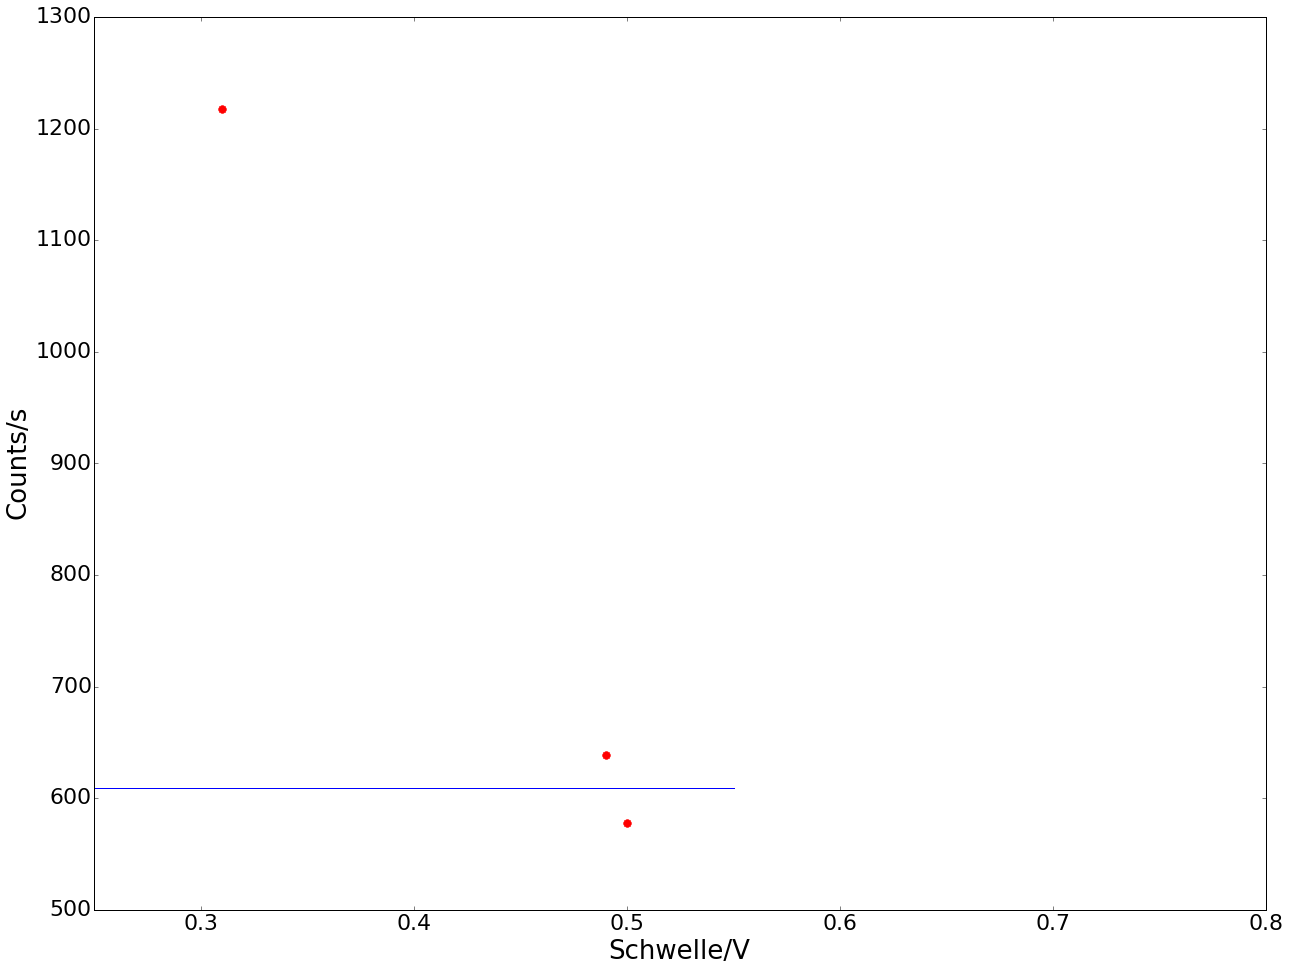

In [103]:
plt.plot(D_list[3][0], (D_list[3][1]-D_list[3][2])/10, '.r', markersize = 15)
plt.plot(np.arange(0.25,0.6,0.1),np.arange(0.25,0.6,0.1)/np.arange(0.25,0.6,0.1)*(D_list[3][1][0]-D_list[3][2][0])/20,'b')
plt.xlim([0.25,0.6])
plt.tick_params(labelsize= 22)
plt.xlim([0.25,0.8])
plt.ylabel(r"Counts/s", fontsize = 26)
plt.xlabel("Schwelle/V", fontsize = 26)
plt.show()

###Ergebnisse:
Als Schwelle für die Diskriminatoren ergaben sich die folgenden Werte:
####Diskriminator 1: <font color="red">0,70V</font>
####Diskriminator 2:  <font color="red">0.51V</font>
####Diskriminator 3:
#####Untere: <font color="red">0,41V</font>
#####Obere: <font color="red">0.52V</font>
####Diskriminator 4: <font color="red">0,49V</font>

##Teil 3: Delay

In [69]:
cd /home/arrow13/Git/FP/Myonen/Messdate/Delay/

/home/arrow13/Git/FP/Myonen/Messdate/Delay


In [70]:
Delay_list = []
Delay_list.append(np.array(pd.read_csv("PM1", delim_whitespace=2)).T)
Delay_list.append(np.array(pd.read_csv("PM2", delim_whitespace=2)).T)

###Delay PM1

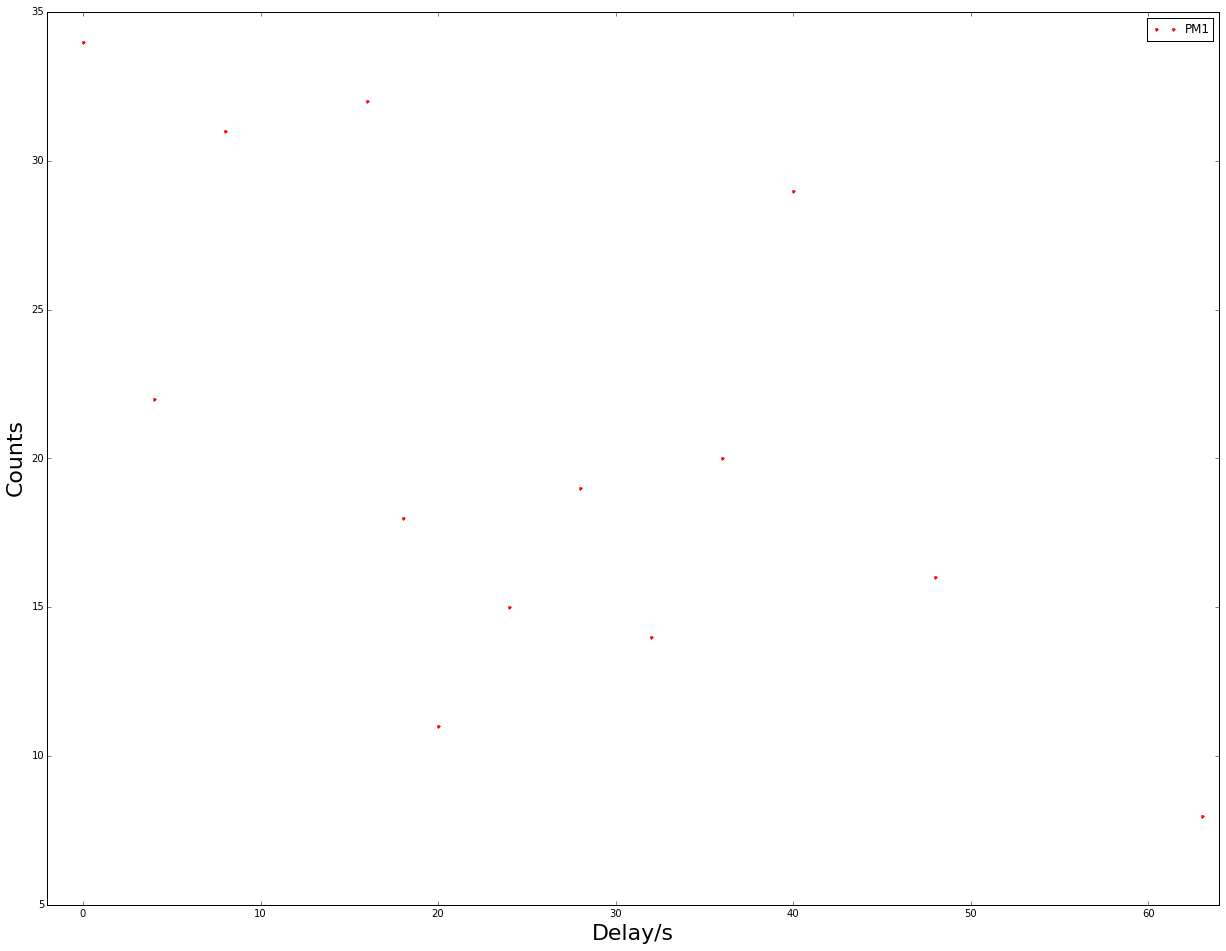

In [71]:
plt.plot(Delay_list[0][0], Delay_list[0][1],'.r', label="PM1")
plt.xlabel("Delay/s", fontsize=22)
plt.ylabel("Counts", fontsize=22)
plt.xlim([-2,64])
plt.legend()
plt.show()

###Delay PM2

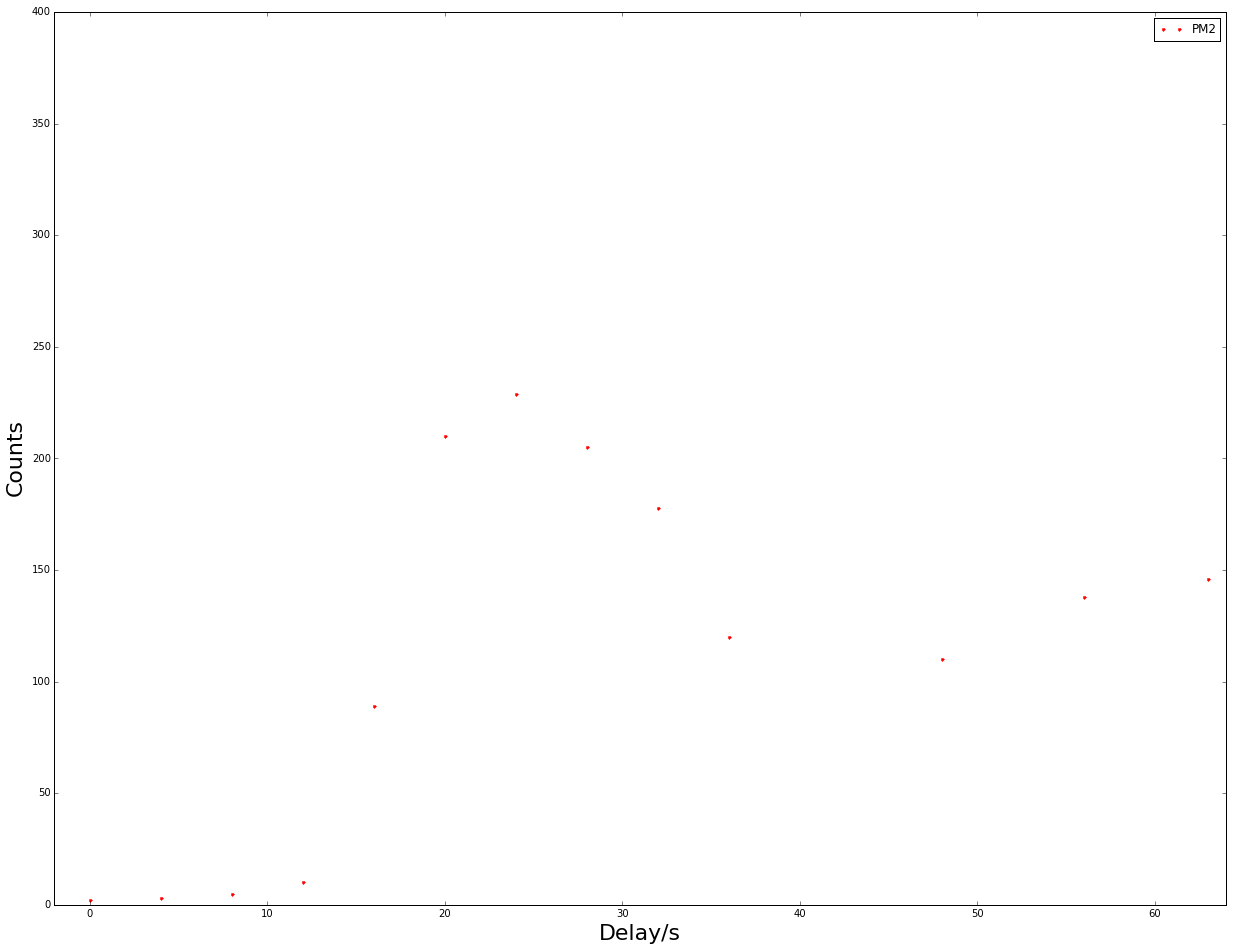

In [72]:
plt.plot(Delay_list[1][0], Delay_list[1][1],'.r', label="PM2")
plt.xlabel("Delay/s", fontsize=22)
plt.ylabel("Counts", fontsize=22)
plt.xlim([-2,64])
plt.ylim([0,400])
plt.legend()
plt.show()

###Ergebnisse:
Die bestimmten Delays für PM1 und PM2 sind im folgenden zu sehen.
####Delay PM1:  <font color="red">9</font>
####Delay PM2:  <font color="red">24</font>

##Teil 4: Kanal-Zeit-Kalibrierung

In [73]:
cd /home/arrow13/Git/FP/Myonen/Messdate/Kanal_Zeit/

/home/arrow13/Git/FP/Myonen/Messdate/Kanal_Zeit


In [74]:
mod = LinearModel()
guess = mod.guess(kanal_zeit[1],x=kanal_zeit[0])
fit = mod.fit(kanal_zeit[1], guess, x=kanal_zeit[0])
print(fit.fit_report(min_correl=0.25))

NameError: name 'kanal_zeit' is not defined

In [ ]:
kanal_zeit = np.array(pd.read_csv("kalib", delim_whitespace=2)).T
print(kanal_zeit[2])

In [ ]:
plt.errorbar(kanal_zeit[0], kanal_zeit[1],yerr=kanal_zeit[2]*5,fmt=". r",label="Kanal-Zeit")
plt.plot(kanal_zeit[0], fit.best_fit, '-b', label="Linearer Fit der Kanal-Zeit")
plt.xlabel("Kanal", fontsize=22)
plt.ylabel("Zeit", fontsize=22)
#plt.xlim([-2,64])
#plt.ylim([0,400])
plt.legend()
plt.show()